In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load dataset
Fraud_data = pd.read_csv('Fraud_check (1).csv')
Fraud_data.head(10)

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   
5        NO       Divorced           33329           116382                0   
6        NO       Divorced           83357            80890                8   
7       YES         Single           62774           131253                3   
8        NO         Single           83519           102481               12   
9       YES       Divorced           98152           155482                4   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  
5    NO  
6   YES  
7   YES  
8   YES  
9   YES

In [5]:
Fraud_data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [7]:
Fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
Fraud_data.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [9]:
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
Fraud_data['Undergrad'],class_names = pd.factorize(Fraud_data['Undergrad'])
Fraud_data.Undergrad
print(class_names)

Index(['NO', 'YES'], dtype='object')


In [11]:
Fraud_data['Marital.Status'],class_names2 = pd.factorize(Fraud_data['Marital.Status'])
Fraud_data['Marital.Status']
print(class_names2)

Index(['Single', 'Divorced', 'Married'], dtype='object')


In [12]:
Fraud_data['Urban'],class_names3 = pd.factorize(Fraud_data['Urban'])
Fraud_data['Urban']
print(class_names3)

Index(['YES', 'NO'], dtype='object')


In [13]:
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


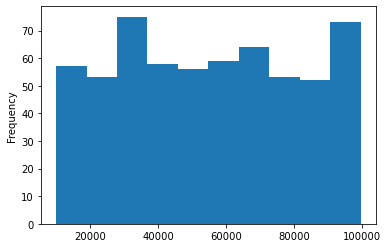

In [14]:
Fraud_data['Taxable.Income'].plot.hist()
plt.show()

In [15]:
Fraud_data['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [16]:
#Converting the sales column which is continous into categorical
category = pd.cut(Fraud_data['Taxable.Income'],bins=[0,30000,99619],labels = ['Risky', 'Good'])
Fraud_data.insert(0, 'Taxable_Group',category)

In [17]:
Fraud_data

Taxable_Group  Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            Good          0               0           68833            50047   
1            Good          1               1           33700           134075   
2            Good          0               2           36925           160205   
3            Good          1               0           50190           193264   
4            Good          0               2           81002            27533   
..            ...        ...             ...             ...              ...   
595          Good          1               1           76340            39492   
596          Good          1               1           69967            55369   
597          Good          0               1           47334           154058   
598          Good          1               2           98592           180083   
599          Good          0               1           96519           158137   

     Work.Experience  Urban  
0                 10      0  
1                 18      0  
2                 30      0  
3                 15      0  
4                 28      1  
..               ...    ...  
595                7      0  
596                2      0  
597                0      0  
598               17      1  
599               16      1  

[600 rows x 7 columns]

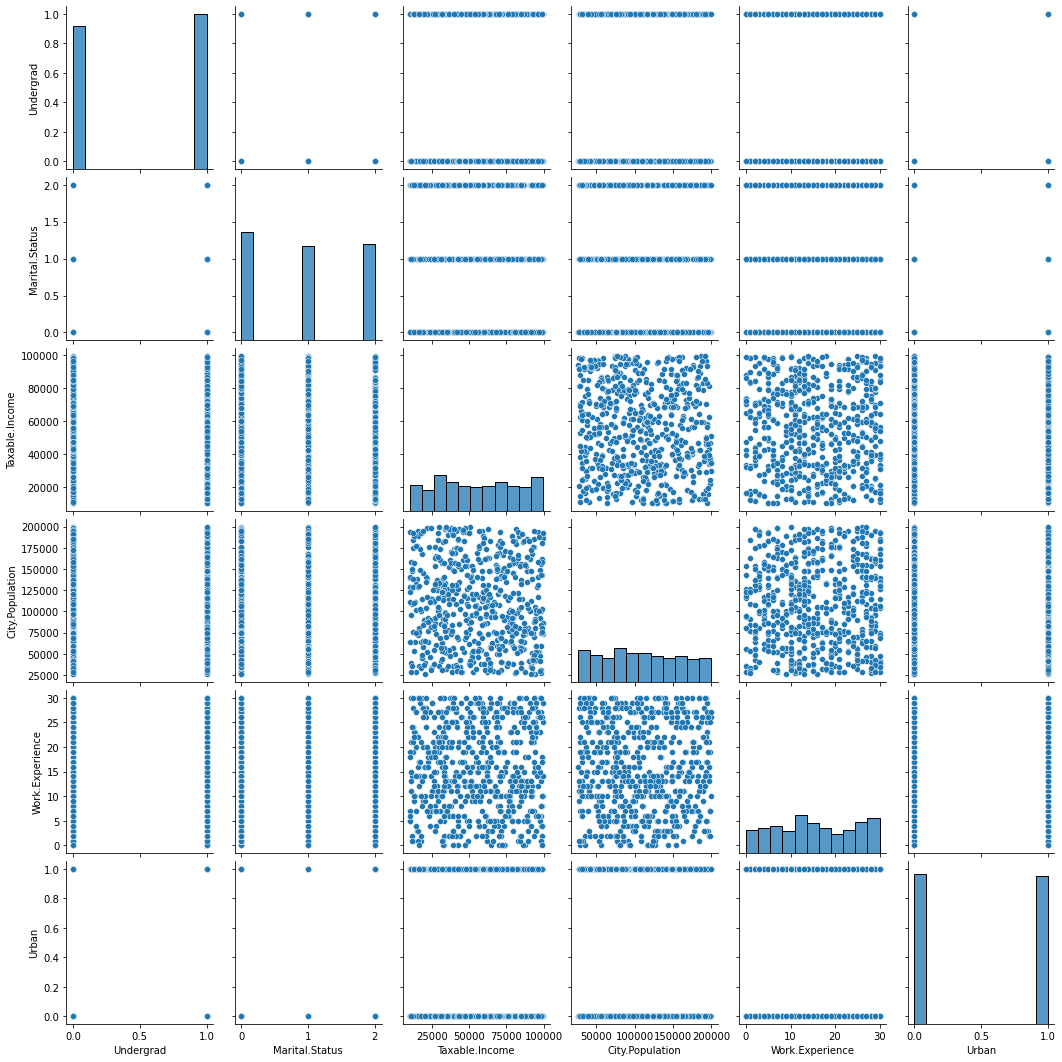

In [18]:
import seaborn as sns
sns.pairplot(Fraud_data)

In [19]:
Fraud_data['Taxable_Group'].unique()
Fraud_data.Taxable_Group.value_counts()

Good     476
Risky    124
Name: Taxable_Group, dtype: int64

In [20]:
#Feature selection

In [21]:
colnames = list(Fraud_data.columns)
colnames

['Taxable_Group',
 'Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [22]:
predictors = colnames[1: ]  #excluding 1st column
predictors

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [23]:
target = colnames[0] #only 1st column
target

'Taxable_Group'

In [24]:
#splitting data into training and testing data

In [25]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(Fraud_data,test_size = 0.3)
test

Taxable_Group  Undergrad  Marital.Status  Taxable.Income  City.Population  \
174          Good          1               0           44795           149857   
445          Good          0               1           50119           128451   
392         Risky          1               1           26372            37776   
519          Good          1               0           60915           162102   
419          Good          0               2           68269           138074   
..            ...        ...             ...             ...              ...   
451          Good          1               1           48640           108262   
477          Good          1               1           57402           158849   
287          Good          1               0           89831            77102   
27           Good          1               0           87778            28542   
332          Good          1               1           98240            84132   

     Work.Experience  Urban  
174                8      1  
445               12      1  
392               15      1  
519               25      0  
419               20      1  
..               ...    ...  
451               10      0  
477               29      1  
287                1      0  
27                12      0  
332                1      1  

[180 rows x 7 columns]

In [27]:
test.shape

(180, 7)

In [28]:
train

Taxable_Group  Undergrad  Marital.Status  Taxable.Income  City.Population  \
181         Risky          0               1           29543            36116   
80           Good          0               2           44947            28184   
538          Good          0               2           54850           119976   
295          Good          1               2           52912            40089   
587          Good          0               0           87685           154677   
..            ...        ...             ...             ...              ...   
496          Good          1               1           72151            59382   
291          Good          1               0           31699            62475   
39           Good          0               2           74010            54981   
149          Good          0               0           40220            49505   
212          Good          1               1           62067           112659   

     Work.Experience  Urban  
181               20      1  
80                26      1  
538               12      1  
295               10      1  
587               26      0  
..               ...    ...  
496                5      0  
291               26      0  
39                16      0  
149               25      1  
212               14      1  

[420 rows x 7 columns]

In [29]:
train.shape

(420, 7)

### Decision Tree Model Building

In [30]:
#using entropy cruterion

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy')

In [33]:
preds = model.predict(test[predictors])
preds

array(['Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Goo

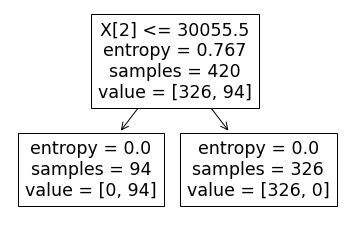

In [34]:
#plot Decision tree
from sklearn import tree
tree.plot_tree(model);

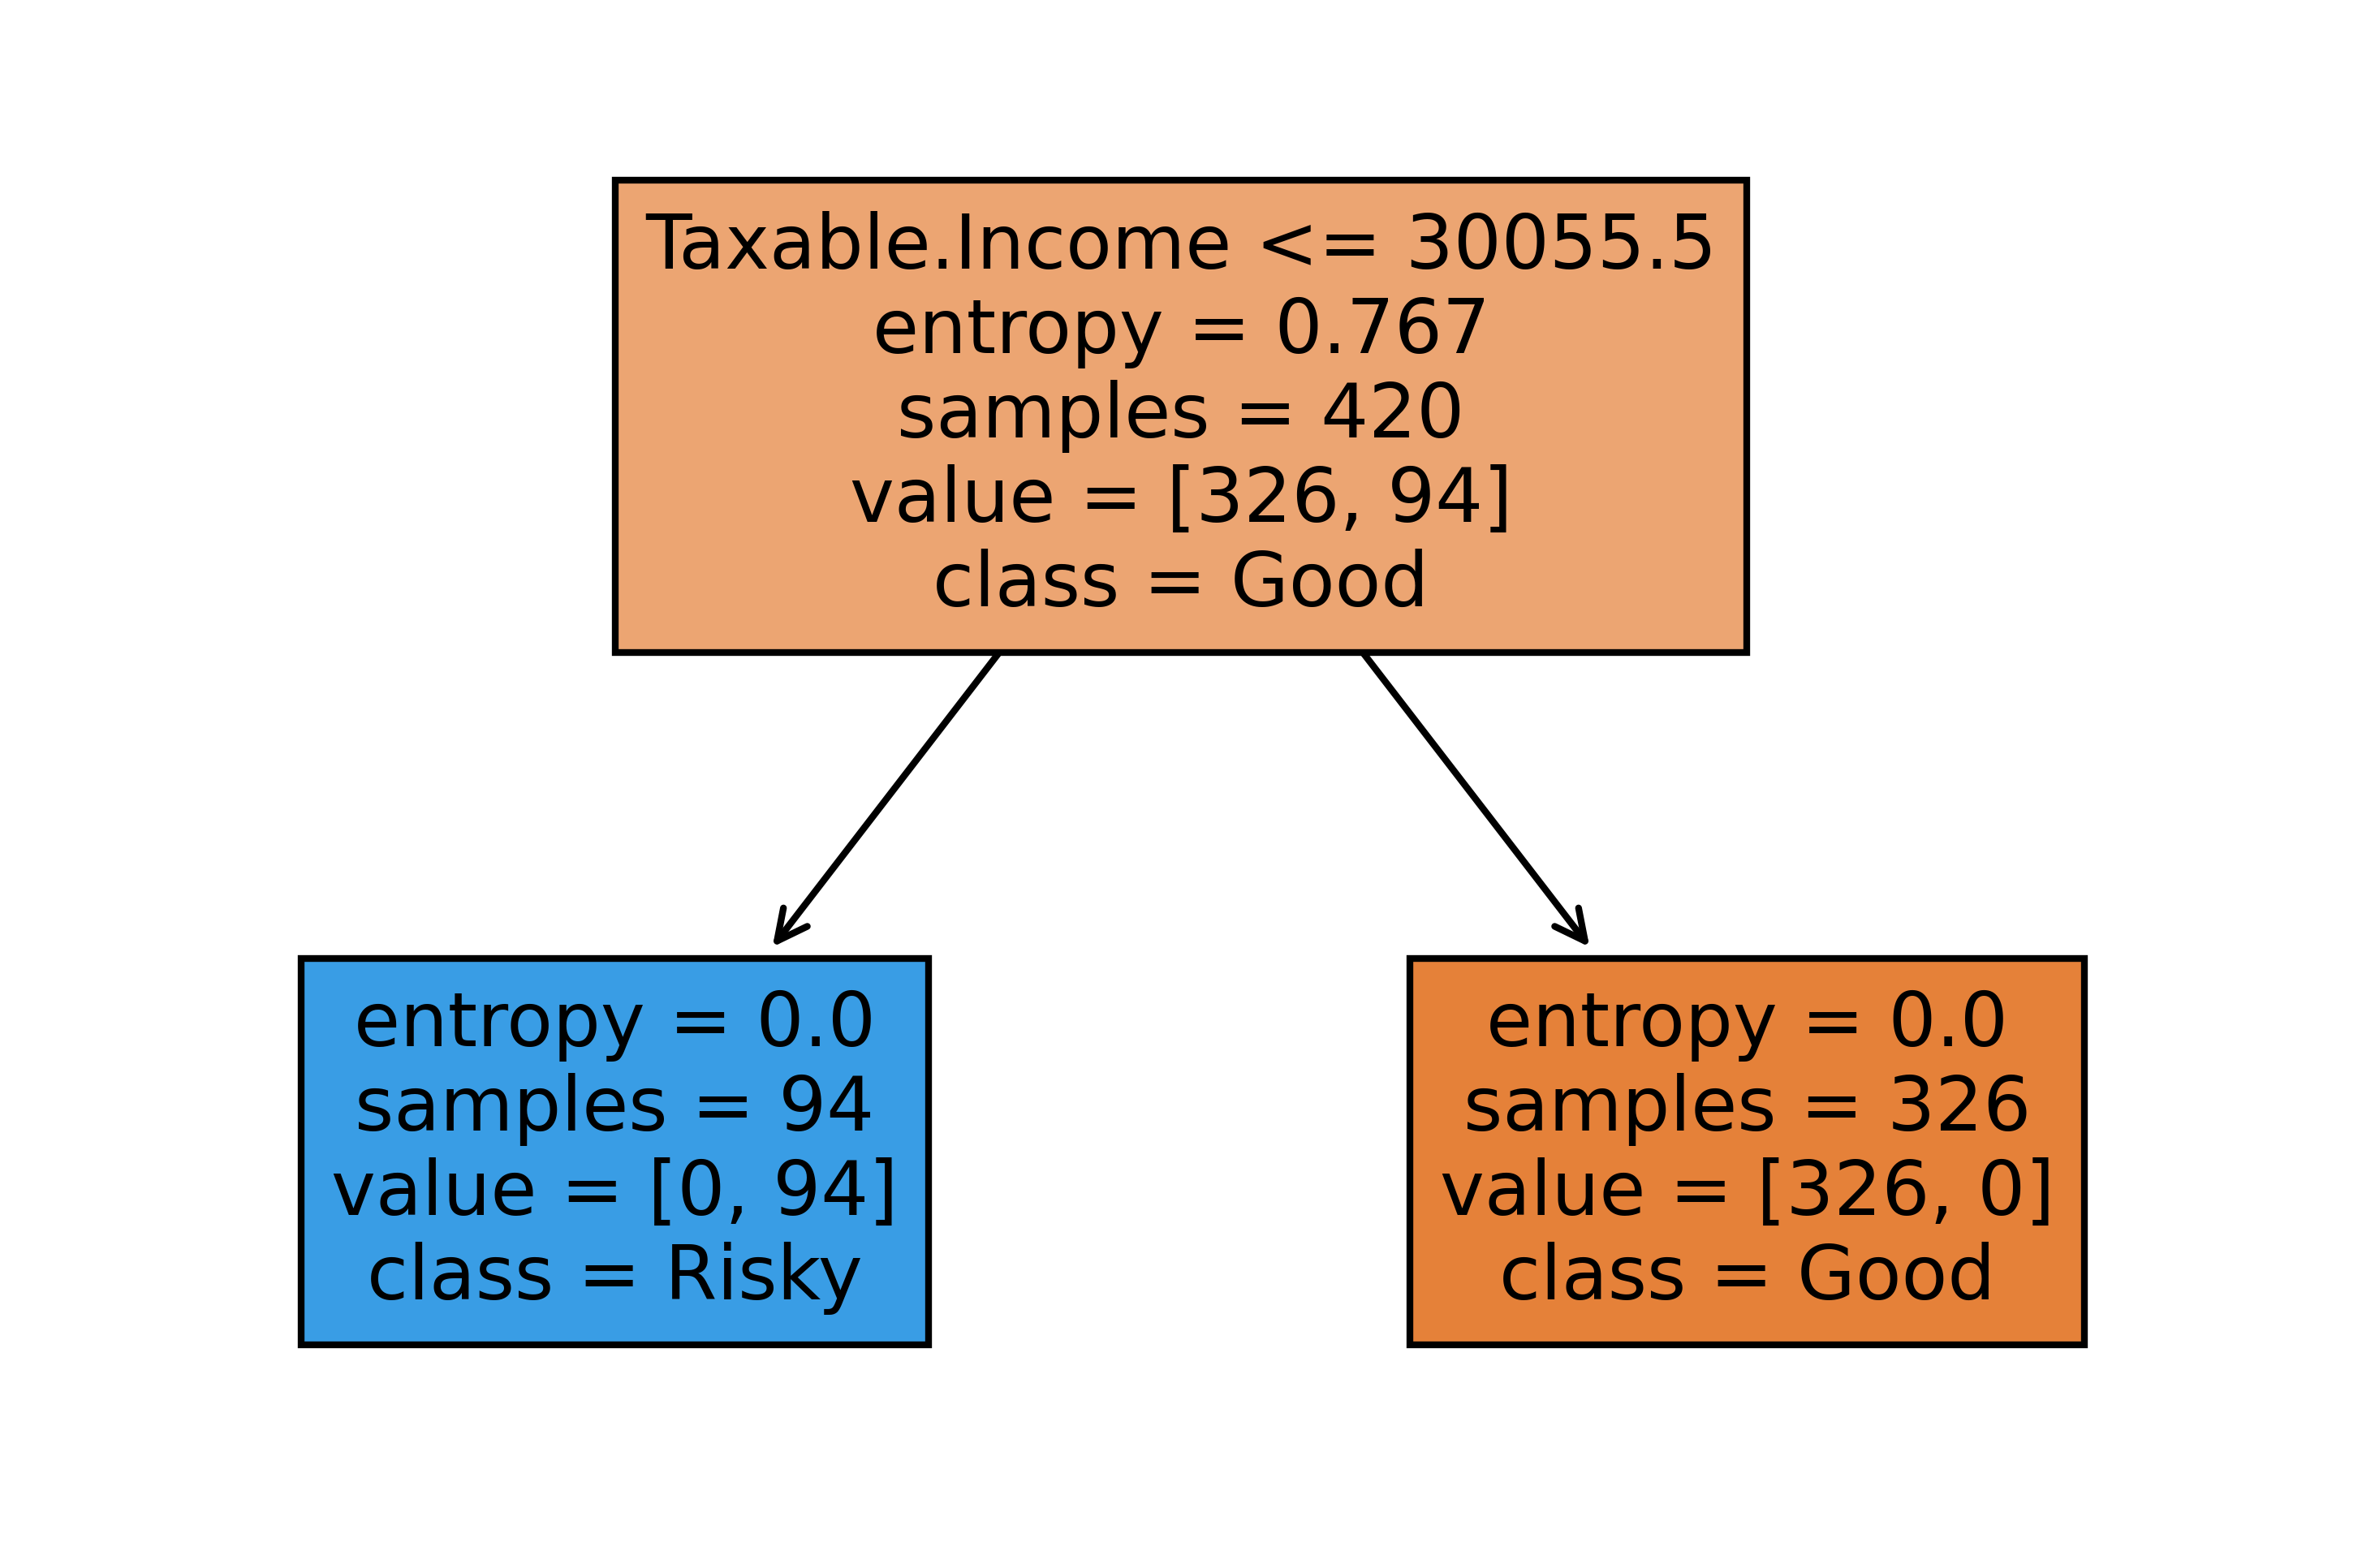

In [35]:
fn = ['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn = ['Good','Risky']
fig,axes = plt.subplots(nrows = 1, ncols=1, dpi=600)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

In [36]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(test[target],preds))

Accuracy: 1.0


In [37]:
pd.Series(preds).value_counts()

Good     150
Risky     30
dtype: int64

In [38]:
pd.crosstab(test[target],preds)

col_0          Good  Risky
Taxable_Group             
Risky             0     30
Good            150      0

In [39]:
np.mean(preds==test.Taxable_Group)

1.0

In [40]:
model.score(test[predictors],test[target])

1.0